# Prédire le prix d’une maison (simple)

Régression linéaire **1 variable** : $\text{prix} \approx \theta_0 + \theta_1 \cdot \text{surface}$.

On :
1) génère un dataset (surface → prix),
2) entraîne avec **descente de gradient**,
3) affiche un graphique final : **surface vs prix** (réel + droite + point prédit).


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
plt.rcParams["figure.figsize"] = (7, 4)

In [77]:
# 1) Génération du dataset (surface -> prix)
# Unités: surface en m², prix en k€

def generate_data(n=200, seed=42):
    rng = np.random.default_rng(seed)
    surface = rng.uniform(20, 180, size=n)

    # relation (linéaire) + bruit
    noise = rng.normal(0, 25, size=n)
    price = 2.8 * surface + 50 + noise
    price = np.clip(price, 20, None)

    return pd.DataFrame({"surface": surface, "price": price})


df = generate_data(n=100, seed=10)
X = df[["surface"]].to_numpy(dtype=float)  # shape (n, 1)
y = df["price"].to_numpy(dtype=float)      # shape (n,)

df.head()

,surface,price
0,172.960274,532.128201
1,53.229090,208.708557
2,152.551182,520.512474
3,43.885140,199.503469
4,102.048739,330.750292


In [78]:
# 2) Descente de gradient (régression linéaire)

# On standardise X pour que la descente de gradient converge facilement
x_mean = X.mean(axis=0)
x_std = X.std(axis=0)
x_std = np.where(x_std == 0, 1.0, x_std)

X_s = (X - x_mean) / x_std
Xb = np.c_[np.ones((X_s.shape[0], 1)), X_s]  # biais

# theta = [theta0, theta1]
theta = np.zeros(2, dtype=float)

lr = 0.05
n_iters = 2000
loss_history = []

for _ in range(n_iters):
    y_pred = Xb @ theta
    error = y_pred - y
    grad = (2 / len(y)) * (Xb.T @ error)
    theta -= lr * grad
    loss_history.append(np.mean(error ** 2))

print("theta (sur X standardisé) =", theta)
print("MSE final =", loss_history[-1])

theta (sur X standardisé) = [320.88386155 120.69936754]
MSE final = 744.5331142403795


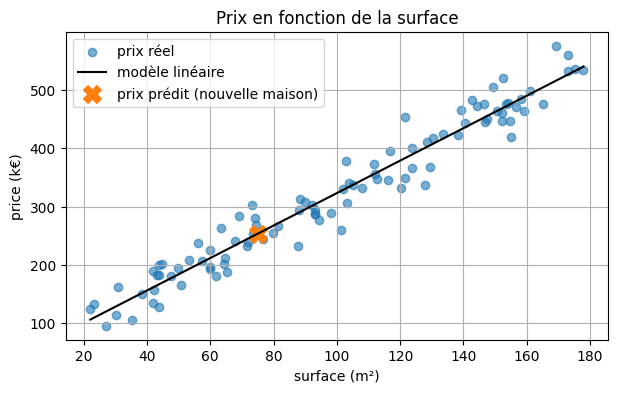

Pour surface=75.0 m² → prix prédit = 253.60 k€


In [79]:
# 3) Prédire une nouvelle maison + graphique final (surface vs prix)

surface_new = 75.0
price_pred = float(predict(theta, np.array([[surface_new]]), x_mean, x_std)[0])

# Droite de régression (sur l'échelle originale)
surface_line = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
price_line = predict(theta, surface_line, x_mean, x_std)

plt.scatter(X[:, 0], y, alpha=0.6, label="prix réel")
plt.plot(surface_line[:, 0], price_line, color="black", label="modèle linéaire")
plt.scatter([surface_new], [price_pred], marker="X", s=160, label="prix prédit (nouvelle maison)")

plt.title("Prix en fonction de la surface")
plt.xlabel("surface (m²)")
plt.ylabel("price (k€)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Pour surface={surface_new} m² → prix prédit = {price_pred:.2f} k€")